In [1]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
import torch


mnist_transform = transforms.Compose(
    [
        transforms.ToTensor(), # torchvision 이 오직 PIL Image 형태로만 받아 tensor 형태로 변환 필요
        transforms.Normalize(mean=(0.5,), std=(1.0,),)
    ]
)

In [2]:
import urllib.request
import gzip
import shutil
import os

# if

# Define the URLs for the MNIST dataset
urls = {
    "train-images-idx3-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz": "https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz"
}

# Define the directory to save the dataset
dataset_dir = "content/MNIST/raw"
os.makedirs(dataset_dir, exist_ok=True)

# check if the dataset is already downloaded
if not all([os.path.exists(os.path.join(dataset_dir, filename.replace('.gz', ''))) for filename in urls.keys()]):
    print("The dataset files are already downloaded.")
    # Function to download and extract the dataset
    def download_and_extract(url, filename):
        filepath = os.path.join(dataset_dir, filename)
        print(f"Downloading {url} to {filepath}")
        urllib.request.urlretrieve(url, filepath)
        print(f"Extracting {filepath}")
        with gzip.open(filepath, 'rb') as f_in:
            with open(filepath.replace('.gz', ''), 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove(filepath)

    # Download and extract each file
    for filename, url in urls.items():
        download_and_extract(url, filename)

train_set = datasets.MNIST(
    root='content/', 
    train=True, 
    download=True, 
    transform=mnist_transform
    )

test_set = datasets.MNIST(
    root='content/', 
    train=False, 
    download=True, 
    transform=mnist_transform
    )

In [3]:
train_loader = DataLoader(train_set, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=8, shuffle=False, num_workers=2)

In [4]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [5]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

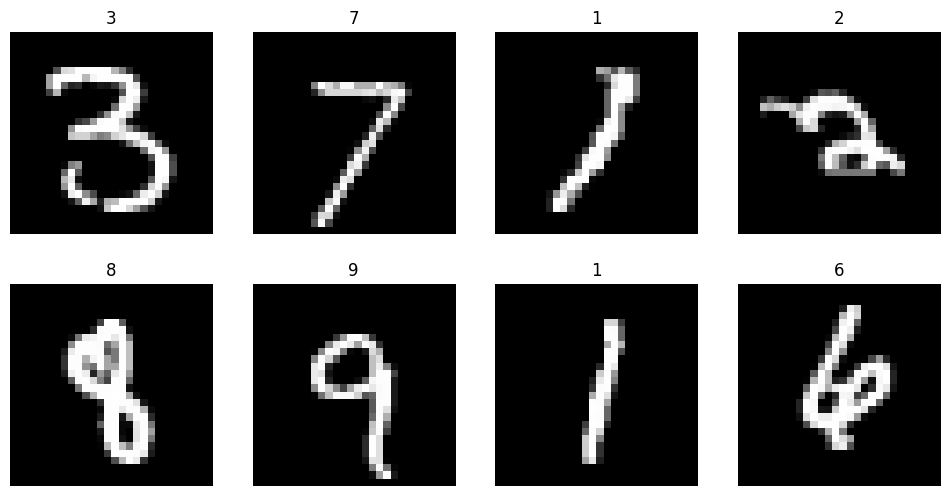

In [6]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()

In [7]:
import torch.nn as nn

In [8]:
input = torch.randn(128, 20)
print(input)

tensor([[ 0.2022,  1.1808, -0.6868,  ...,  1.0474,  1.7699, -2.6731],
        [ 0.0842,  0.5329, -1.4590,  ...,  0.6920,  0.6534, -1.6823],
        [-0.7494, -0.3998,  0.4705,  ..., -0.1407, -1.2385, -0.2788],
        ...,
        [-0.1100,  1.0785,  1.5538,  ...,  1.2845,  1.8563, -0.7296],
        [-0.9807, -0.6562, -0.8799,  ...,  0.9268,  0.0101,  0.0420],
        [-0.7016,  0.1286, -1.6780,  ..., -1.2565, -0.0894, -0.2591]])


In [9]:
m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size()) # torch.matmlu(input, m.weight.t()) + m.bias => 128 x 30

Linear(in_features=20, out_features=30, bias=True)
tensor([[ 1.5624e-01, -4.8150e-01,  1.3261e+00,  ..., -2.0838e-04,
         -1.4353e+00,  5.7660e-02],
        [ 2.4739e-01,  4.4589e-02, -3.0476e-01,  ..., -8.6754e-01,
         -6.8112e-01,  9.0416e-01],
        [ 1.4804e-01, -2.4762e-01, -4.0977e-01,  ..., -5.6142e-01,
          8.0073e-01,  7.0469e-01],
        ...,
        [ 7.2710e-01, -1.2694e+00, -3.9968e-01,  ..., -1.5486e+00,
         -6.1200e-01,  1.0906e+00],
        [-7.3526e-01, -4.0659e-01, -1.1610e+00,  ...,  3.0791e-01,
         -1.3930e+00, -8.2941e-01],
        [ 4.1299e-01, -2.2202e-01,  5.0524e-01,  ...,  6.2670e-02,
         -3.1283e-01, -1.8444e-02]], grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [10]:
input = torch.randn(20, 16, 50, 20)
print(input.size())

torch.Size([20, 16, 50, 20])


In [11]:
import torch.nn as nn

conv1 = nn.Conv2d(16, 33, 3, stride=2)
conv2 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
conv3 = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(conv3)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [12]:
output = m(input)
print(output.size())

torch.Size([20, 16, 50, 30])


In [13]:
nn.Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [20]:
layer = nn.Conv2d(1, 20, 5, 1)

In [16]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [23]:
print(type(weight))

<class 'numpy.ndarray'>


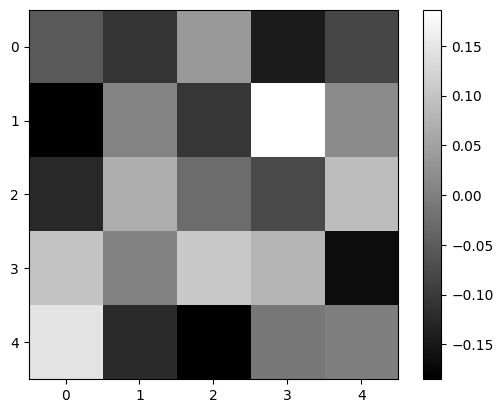

In [25]:
plt.imshow(weight[0, 0, :, :], 'gray')
plt.colorbar()
plt.show()

In [26]:
print(images.shape)
print(images[0].shape)

input_image = torch.squeeze(images[0])
print(input_image.shape)

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [40]:
input_data = torch.unsqueeze(images[0], 0)
print(input_data.shape)

output = layer(input_data)
print(output.shape)
output_arr = output.data.numpy()
print(output_arr.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 20, 24, 24])
(1, 20, 24, 24)


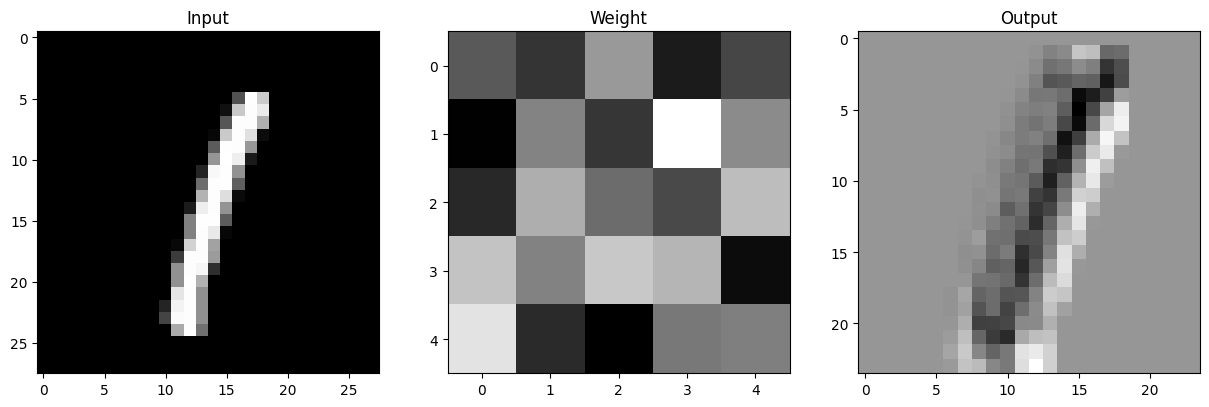

In [46]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0, 0, :, :], 'gray')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0, 0, :, :], 'gray')
plt.show()

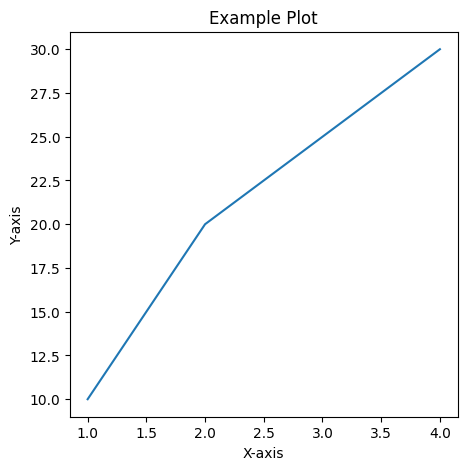

In [42]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(5, 5))

# Plot some data
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Add title and labels
plt.title('Example Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()